In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [5]:
!ls

README           click_log.csv    user.csv
ad.csv           preprocess.ipynb


In [2]:
users = pd.read_csv('user.csv')
ads = pd.read_csv('ad.csv')
log = pd.read_csv('click_log.csv')

In [3]:
ads.replace('\\N', 0, inplace=True)
# ads.fillna(0, inplace=True)
ads.product_id = ads.product_id.astype(np.int64)
ads.industry = ads.industry.astype(np.int64)

In [4]:
merged_log = pd.merge(log, users, on='user_id')
merged_log = pd.merge(merged_log, ads, on='creative_id')

In [74]:
combine_id = lambda x: ','.join([str(i) for i in list(set(x.values))])
combined_log = merged_log[['user_id', 'creative_id']].groupby(['user_id']).agg({'creative_id':combine_id})
user_log = combined_log.reset_index()

combined_log = merged_log[['user_id', 'ad_id']].groupby(['user_id']).agg({'ad_id':combine_id})
user_log = pd.merge(user_log, combined_log.reset_index(), on='user_id')

combined_log = merged_log[['user_id', 'product_id']].groupby(['user_id']).agg({'product_id':combine_id})
user_log = pd.merge(user_log, combined_log.reset_index(), on='user_id')

combined_log = merged_log[['user_id', 'product_category']].groupby(['user_id']).agg({'product_category':combine_id})
user_log = pd.merge(user_log, combined_log.reset_index(), on='user_id')

combined_log = merged_log[['user_id', 'advertiser_id']].groupby(['user_id']).agg({'advertiser_id':combine_id})
user_log = pd.merge(user_log, combined_log.reset_index(), on='user_id')

combined_log = merged_log[['user_id', 'industry']].groupby(['user_id']).agg({'industry':combine_id})
user_log = pd.merge(user_log, combined_log.reset_index(), on='user_id')

user_log = pd.merge(user_log, users, on='user_id')

In [78]:
user_log

,user_id,creative_id,ad_id,product_id,product_category,advertiser_id,industry,age,gender
0,1,"3068256,3592928,1683713,2087846,71691,122032,2...","66210,773445,109959,2638858,1803758,2116146,16...","0,64,136,1261,1454,1334","18,2,5","44865,17189,9702,10988,14668,367,29455,11411,2...","0,64,326,6,73,106,238,245,217",4,1
1,2,"1266180,3765766,2108551,13069,513298,1145367,6...","1959296,1003786,1235723,1436687,575249,1095314...","0,129,128,15872,1064,1323,107,2637,1261,2031,8...","8,2,18","768,38785,18562,33664,17284,26006,918,17951,42...","289,322,36,5,6,328,238,47,207,242,21,250,317,3...",10,1
2,3,"1725184,2081930,2502798,3560473,726940,2556703...","3065742,1798799,2914064,60437,350235,3083678,6...","0,36256,2887,1031,40905,38250,1674,1261,37933,...","2,4,8,12,17,18","31365,16895,15120,9877,918,36384,2336,14498,52...","0,322,6,205,302,54,247,319",7,2
3,4,"215041,2928770,2482695,1230094,4039445,72989,1...","1008002,511235,2407560,67343,1890064,1953681,2...","39904,0,129,2625,58,1862,40071,1261,39856,2065...","2,4,5,7,17,18","50584,13084,52640,25896,7976,811,11948,8877,81...","0,248,6,295,238,47,88,25,317,319",5,1
4,5,"75011,1203465,24333,1635471,1470226,3804062,88...","24966,751113,69138,1281171,1086750,2173089,234...","0,136,1064,1036,2510,87,2620","8,2,18,5","20611,22918,25354,50331,15900,13855,22178,2862...","288,289,322,0,6,8,297,296,203,109,238,242,220,...",4,1
...,...,...,...,...,...,...,...,...,...
899995,899996,"1814717,92193,1477926,654526,2759343,1458800,9...","820416,1270969,84196,2948453,2642153,1571401,8...","0,129,1794,2625,1567","2,18,5","16320,10368,6433,28323,9934,2286,20817,2003,22...","6,40,202,54,248",5,1
899996,899997,"30210,177415,7400,60330,1143180,24333,103918,1...","24966,159111,63976,94426,118474,55948,1001997,...","0,1377,1250,70,1023,26858,87,1400,91,95","18,2,3,5","768,21185,22885,15685,28874,13295,24975,20976,...","161,321,289,5,6,297,60,317,318,319",3,2
899997,899998,"1251649,4323586,1370659,71752,3527177,2302153,...","3037926,3226089,2506442,3043980,3046316,198599...","0,643,43559,35420,39519","17,18,3,12","9058,51814,10988,10989,32974,18103,14681,14682...","0,293,6,333,54",4,2
899998,899999,"1513243,456738,646020,12838,1055898,4000968,27...","927041,251425,2136034,1078468,110687,406152,13...","0,101,2150,35593,140","2,5,8,13,16,17,18","10690,9058,19524,10183,18955,53037,15855,14930...","0,289,291,292,6,232,329,108,333,54,183,217,252...",3,1


# Stat

***
### user.csv: 900000 rows
* user_id - num:900000; range:1-900000 main_key
* *age* - 1-10
* *gender* - 1,2
***
### ads.csv: 2481135 rows
* creative_id - num:2481135 main_key
* ad_id - num:2264190 duplicate
* product_id - num:33273 range: 1-44313 exist_null: '\\N'(92952) 
* **product_category** - range:1-18
* advertiser_id - num:52090 duplicate
* **industry** - num:326 range: 1-335 exist_null: '\\N'(101048)
***
### click_log.csv: 30082771 rows
* **time** - range:1-91
* user_id - num:900000; range:1-900000 foreign_key -> users
* creative_id - num:2481135; range:1-4445718 foreign_key -> ads
* **click_times** - range:1-152
***
###  user+ads+log: 30082771 rows
* **user_id count** - range:2-1706 strange: 839368 (count>10000, focus on *product_category*=[2,18,8])
* creative_id - num:2481135; range:1-4445718 foreign_key -> ads

# Plot

### user.csv

In [73]:
users.groupby(['age']).count()['gender']

age
1      35195
2     149271
3     202909
4     150578
5     130667
6     101720
7      66711
8      31967
9      19474
10     11508
Name: gender, dtype: int64

* ages bar

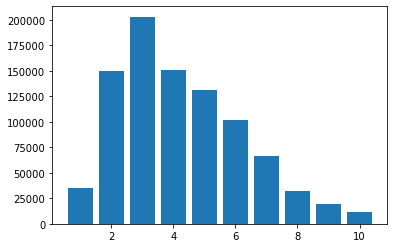

In [84]:
ages = range(1, 11)
nums = users.groupby(['age']).count()['gender']
plt.bar(ages, nums)
plt.show()

* gender bar

In [87]:
users.groupby(['gender']).count()['age']

gender
1    602610
2    297390
Name: age, dtype: int64

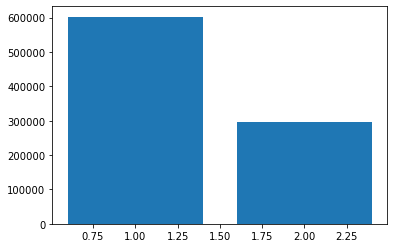

In [88]:
genders = [1,2]
nums = users.groupby(['gender']).count()['age']
plt.bar(genders, nums)
plt.show()

### ad.csv

* product_category bar

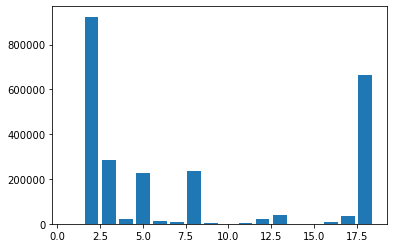

In [92]:
product_categorys = range(1, 19)
nums = ads.groupby(['product_category']).count()['industry']
plt.bar(product_categorys, nums)
plt.show()

* industry bar

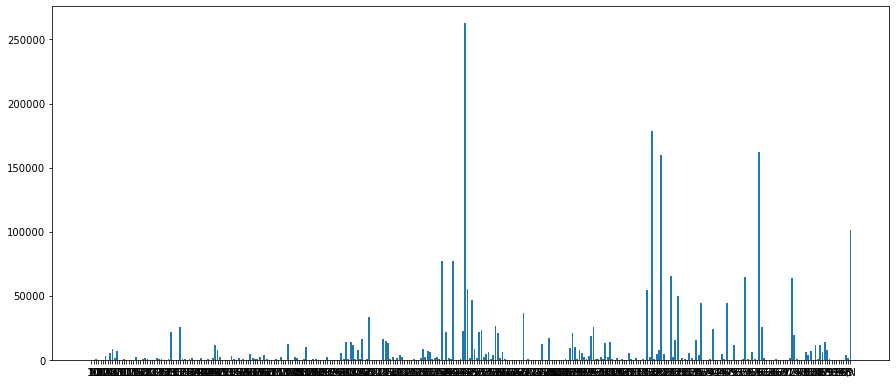

In [105]:
industrys = ads.groupby(['industry']).count()['product_category'].index
nums = ads.groupby(['industry']).count()['product_category']
plt.figure(figsize=(15, 6.5))
plt.bar(industrys, nums)
plt.show()

### click_log.csv

* time bar

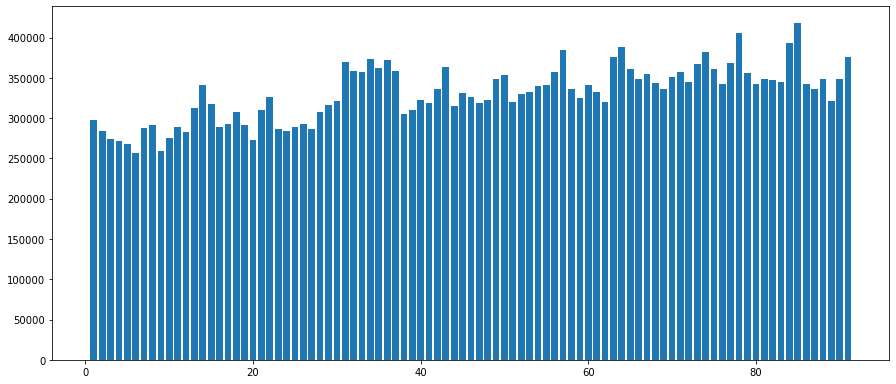

In [110]:
times = log.groupby(['time']).count()['click_times'].index
nums = log.groupby(['time']).count()['click_times']
plt.figure(figsize=(15, 6.5))
plt.bar(times, nums)
plt.show()

* click_times bar

In [113]:
log.groupby(['click_times']).count()['time']

click_times
1      28426543
2       1507449
3         90356
4         43047
5          7507
6          3512
7          1529
8          1486
9           452
10          270
11          172
12          116
13           76
14           62
15           36
16           34
17           22
18           21
19           10
20           13
21           17
22            5
23            4
24            3
25            2
26            3
27            3
28            1
29            2
30            3
32            3
33            2
34            1
35            1
36            1
37            2
43            1
44            1
50            1
67            1
152           1
Name: time, dtype: int64

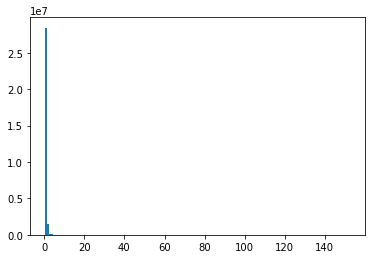

In [112]:
click_times = log.groupby(['click_times']).count()['time'].index
nums = log.groupby(['click_times']).count()['time']
plt.bar(click_times, nums)
plt.show()

### click_log + user + ad

In [93]:
merged_log

,time,user_id,creative_id,click_times,age,gender,ad_id,product_id,product_category,advertiser_id,industry
0,9,30920,567330,1,2,1,504423,30673,3,32638,319
1,15,320815,567330,1,3,1,504423,30673,3,32638,319
2,11,355089,567330,1,1,1,504423,30673,3,32638,319
3,9,363442,567330,1,2,1,504423,30673,3,32638,319
4,14,370513,567330,1,4,1,504423,30673,3,32638,319
...,...,...,...,...,...,...,...,...,...,...,...
30082766,83,309198,4049817,1,2,1,3476184,2819,2,2466,253
30082767,52,309198,2459911,1,2,1,2119242,161,2,676,231
30082768,5,309198,452252,1,2,1,402185,2870,2,7158,247
30082769,76,309198,3686554,2,2,1,3172440,3979,2,52506,247


* user_count bar (long tail)

In [128]:
user_count = merged_log.groupby(['user_id']).count().groupby(['creative_id']).count()

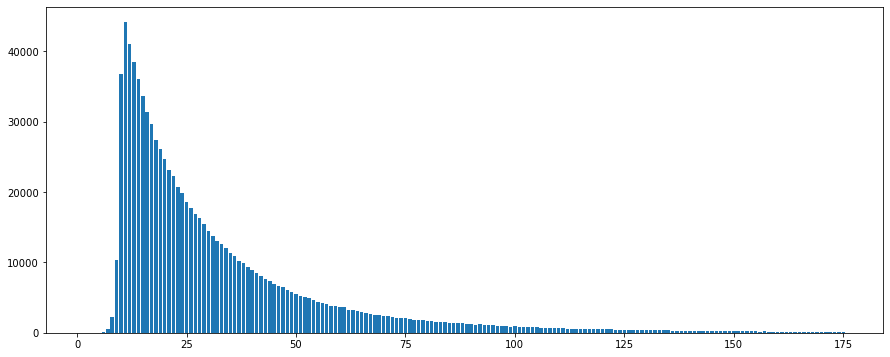

In [149]:
user_ids = user_count['time'].index[:-400]
nums = user_count['time'][:-400]
plt.figure(figsize=(15, 6))
plt.bar(user_ids, nums)
plt.show()

In [158]:
merged_log.groupby(['user_id']).count().groupby(['creative_id']).count().iloc[:40]

,time,click_times,age,gender,ad_id,product_id,product_category,advertiser_id,industry
creative_id,,,,,,,,,
2,1,1,1,1,1,1,1,1,1
3,4,4,4,4,4,4,4,4,4
4,13,13,13,13,13,13,13,13,13
5,34,34,34,34,34,34,34,34,34
6,110,110,110,110,110,110,110,110,110
7,588,588,588,588,588,588,588,588,588
8,2270,2270,2270,2270,2270,2270,2270,2270,2270
9,10341,10341,10341,10341,10341,10341,10341,10341,10341
10,36697,36697,36697,36697,36697,36697,36697,36697,36697


In [151]:
merged_log[merged_log.user_id == 839368].groupby(['industry'])

,time,user_id,creative_id,click_times,age,gender,ad_id,product_id,product_category,advertiser_id,industry
36745,49,839368,2085566,6,6,1,1801889,129,2,42272,6
36746,59,839368,2085566,8,6,1,1801889,129,2,42272,6
36747,48,839368,2085566,5,6,1,1801889,129,2,42272,6
36748,58,839368,2085566,3,6,1,1801889,129,2,42272,6
36749,54,839368,2085566,7,6,1,1801889,129,2,42272,6
...,...,...,...,...,...,...,...,...,...,...,...
29859180,28,839368,1374191,1,6,1,1200753,11622,8,25854,329
29859181,27,839368,1422977,1,6,1,1241049,0,18,34061,176
29859182,29,839368,1464710,2,6,1,1275862,1674,2,13559,322
29859183,34,839368,1476674,1,6,1,1285901,0,18,34508,47
